In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
labels = os.listdir('/content/drive/MyDrive/dataset (1)/train')
labels

['freshbanana',
 'rottenapples',
 'rottenoranges',
 'freshapples',
 'rottenbanana',
 'freshoranges']

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2,zoom_range=0.2,shear_range=0.3,horizontal_flip=True,brightness_range=[0.5,1.5])

tg = datagen.flow_from_directory(directory='/content/drive/MyDrive/dataset (1)/train', target_size=(224,224), classes=labels, batch_size=25, subset='training')
vg = datagen.flow_from_directory(directory='/content/drive/MyDrive/dataset (1)/train', target_size=(224,224), classes=labels, batch_size=25, subset='validation')

Found 8748 images belonging to 6 classes.
Found 2184 images belonging to 6 classes.


In [ ]:
tg.class_indices

{'freshapples': 3,
 'freshbanana': 0,
 'freshoranges': 5,
 'rottenapples': 1,
 'rottenbanana': 4,
 'rottenoranges': 2}

In [ ]:
#Dictionary with key and correct values as labels5
image_class_dict={0:'freshbanana',
 1:'rottenapples',
 2:'rottenoranges',
 3:'freshapples',
 4:'rottenbanana',
 5:'freshoranges',
}


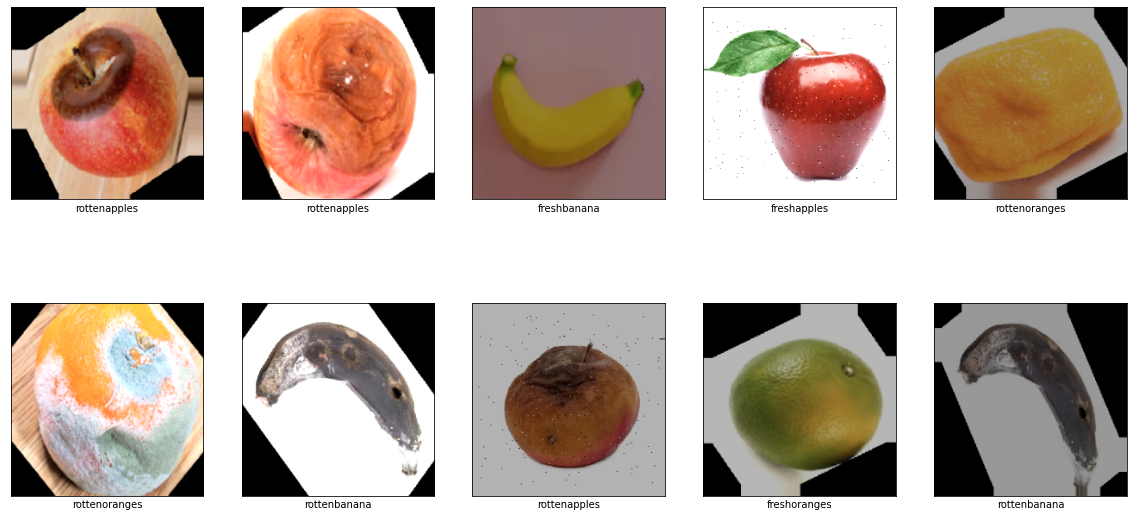

In [ ]:
### Ploting Augmented Images

images,label=tg.next()
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    l=label[i]
    for j in range(6):
        if l[j]==1:
            plt.xlabel(image_class_dict[j])
        else :
            pass

        

In [ ]:
from  keras.models  import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.get_config()

{'layers': [], 'name': 'sequential'}

In [ ]:
from   keras.layers import  Convolution2D

In [ ]:
model.add(
Convolution2D(
    filters=16,
    kernel_size=(3,3),
    input_shape=(224,224,3),
    activation='relu'
)
)

In [ ]:
from keras.layers   import  MaxPooling2D

In [ ]:
model.add(
MaxPooling2D(pool_size=(2,2))
)

In [ ]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'name': 'conv2d_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Conv2D',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 224, 224, 3),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'dtype': 'float32',
    'filters': 16,
    'groups': 1,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (3, 3),
    'name': 'conv2d',
    'padding': 'valid',
    'strides': (1, 1),
    'trainable': True,
    'use_bias': True}},
  {'class_name': 'MaxPooling2D',
   'config': {'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'max_p

In [ ]:
model.add(
Convolution2D(
    filters=32,
    kernel_size=(3,3),
    activation='relu'
)
)

In [ ]:
model.add(
MaxPooling2D(pool_size=(2,2))
)

In [ ]:
model.add(
Convolution2D(
    filters=64,
    kernel_size=(3,3),
    activation='relu'
)
)

In [ ]:
model.add(
MaxPooling2D(pool_size=(2,2))
)

In [ ]:
from keras.layers   import Flatten

In [ ]:
model.add(Flatten())

In [ ]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'name': 'conv2d_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Conv2D',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 224, 224, 3),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'dtype': 'float32',
    'filters': 16,
    'groups': 1,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (3, 3),
    'name': 'conv2d',
    'padding': 'valid',
    'strides': (1, 1),
    'trainable': True,
    'use_bias': True}},
  {'class_name': 'MaxPooling2D',
   'config': {'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'max_p

In [ ]:
from  keras.layers import  Dense

In [ ]:
model.add ( Dense(units=128,  activation='relu')  )

In [ ]:
model.add ( Dense(units=128,  activation='relu')  )

In [ ]:
model.add ( Dense(units=6,  activation='softmax')  )

In [ ]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'name': 'conv2d_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Conv2D',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 224, 224, 3),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'dtype': 'float32',
    'filters': 16,
    'groups': 1,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (3, 3),
    'name': 'conv2d',
    'padding': 'valid',
    'strides': (1, 1),
    'trainable': True,
    'use_bias': True}},
  {'class_name': 'MaxPooling2D',
   'config': {'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'max_p

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [ ]:
history = model.fit(tg, steps_per_epoch=len(tg), epochs=10, validation_data=vg, validation_steps=len(vg))

Epoch 1/10
350/350 [==============================] - 2643s 7s/step - loss: 0.8049 - accuracy: 0.6948 - val_loss: 0.4855 - val_accuracy: 0.8100
Epoch 2/10
350/350 [==============================] - 200s 573ms/step - loss: 0.4461 - accuracy: 0.8398 - val_loss: 0.4445 - val_accuracy: 0.8342
Epoch 3/10
350/350 [==============================] - 194s 555ms/step - loss: 0.3504 - accuracy: 0.8695 - val_loss: 0.2309 - val_accuracy: 0.9226
Epoch 4/10
350/350 [==============================] - 197s 562ms/step - loss: 0.2795 - accuracy: 0.8987 - val_loss: 0.2200 - val_accuracy: 0.9176
Epoch 5/10
350/350 [==============================] - 200s 572ms/step - loss: 0.2439 - accuracy: 0.9132 - val_loss: 0.1874 - val_accuracy: 0.9396
Epoch 6/10
350/350 [==============================] - 201s 574ms/step - loss: 0.2136 - accuracy: 0.9228 - val_loss: 0.1963 - val_accuracy: 0.9318
Epoch 7/10
350/350 [==============================] - 198s 567ms/step - loss: 0.1911 - accuracy: 0.9331 - val_loss: 0.1367 - v

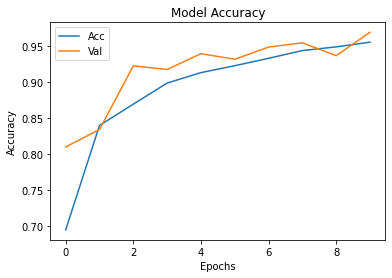

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

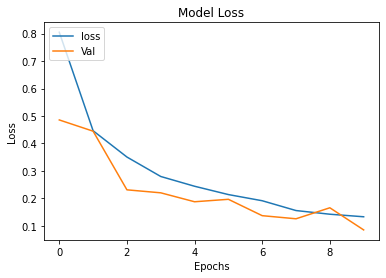

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

In [12]:
from keras.preprocessing import image
test_image = image.load_img("/content/drive/MyDrive/dataset (1)/test/rottenbanana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.13 PM.png", target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = m.predict(test_image)
print(result)


[[0. 0. 0. 0. 1. 0.]]


In [10]:
from keras.preprocessing import image
test_image = image.load_img("/content/drive/MyDrive/dataset (1)/test/rottenoranges/Screen Shot 2018-06-12 at 11.27.01 PM.png", target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = m.predict(test_image)
print(result)

[[0. 0. 1. 0. 0. 0.]]


In [ ]:
model.save('/content/drive/MyDrive/fruit_model.h5')

In [3]:
from keras.models import load_model

In [4]:
m=load_model('/content/drive/MyDrive/fruit_model.h5')

In [7]:
m.predict('/content/drive/MyDrive/dataset (1)/test/rottenapples/Screen Shot 2018-06-07 at 2.15.34 PM.png')

IndexError: ignored

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(m)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmptgdtn6wg/assets


22319300